<div>
<img src=https://www.institutedata.com/wp-content/uploads/2019/10/iod_h_tp_primary_c.svg width="300">
</div>

# Lab 5.1
# *Logistic Regression*

## Predicting Survival on the Titanic

The Titanic sank during her maiden voyage after colliding with an iceberg (April 15, 1912). Due to a commercial decision there were insufficient lifeboats, a fact that was partially responsible for the loss 1,502 out of 2,224 passengers and crew.

The Titanic dataset incorporates many features of typical real-world problems: a mixture of continuous and discrete features, missing data, linear covariance, and an element of random chance. Predicting survival therefore involves many practical data science skills.

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

from sklearn import metrics

%matplotlib inline

### 1. Load Data

Load the `titanic.csv` file into a DataFrame named "titanic", with index column = `PassengerId`. Display the head of the DataFrame.

In [5]:
# ANSWER - TRAINING DATA
titanic_csv = r'C:\Users\ryant\Desktop\IOD\DATA\titanic_train.csv'
ttrain = pd.read_csv(titanic_csv, index_col=0)
ttrain

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S


Why would we want to set an index column based on `PassengerId`?

ANSWER: This column is the key to training and testing our model. We use it to partition the dataset and to test the predictions of our model against known outcomes.

<a name="datadictionary"></a>
### 2. Data Dictionary

If a data dictionary is available, it is handy to include it in the notebook for reference:

| Variable |                                 Definition | Key                                            |
|----------|-------------------------------------------:|------------------------------------------------|
| Survival | Survival                                   | 0 = No, 1 = Yes                                |
| Pclass   | Ticket class                               | 1 = 1st, 2 = 2nd, 3 = 3rd                      |
| Sex      | Sex                                        |                                                |
| Age      | Age in years                               |                                                |
| SibSp    | # of siblings / spouses aboard the Titanic |                                                |
| Parch    | # of parents / children aboard the Titanic |                                                |
| Ticket   | Ticket number                              |                                                |
| Fare     | Passenger fare                             |                                                |
| Cabin    | Cabin number                               |                                                |
| Embarked | Port of Embarkation                        | C = Cherbourg, Q = Queenstown, S = Southampton |

### 2. EDA

Explore dataset. Find features to predict `Survived`.

In [81]:
ttrain.info()

<class 'pandas.core.frame.DataFrame'>
Index: 891 entries, 1 to 891
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    object 
 3   Sex       891 non-null    object 
 4   Age       891 non-null    float64
 5   SibSp     891 non-null    int64  
 6   Parch     891 non-null    int64  
 7   Ticket    891 non-null    object 
 8   Fare      891 non-null    float64
 9   Cabin     204 non-null    object 
 10  Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 83.5+ KB


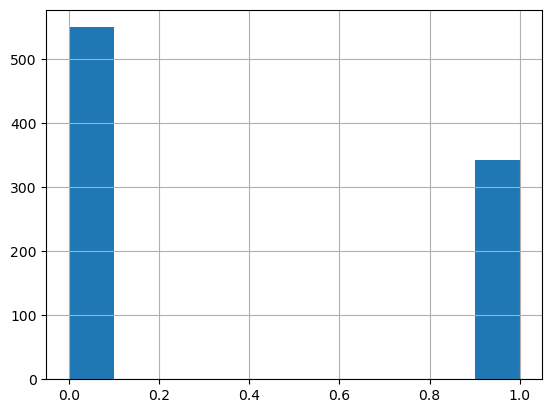

In [92]:
ttrain['Survived'].hist()
plt.show()

In [150]:
# ANSWER
ttrain.isnull().sum()

Survived      0
Pclass        0
Name          0
Sex           0
Age         177
SibSp         0
Parch         0
Ticket        0
Fare          0
Cabin       687
Embarked      2
dtype: int64

In [152]:
ttrain.groupby('Sex')['Age'].mean()

Sex
female    27.915709
male      30.726645
Name: Age, dtype: float64

In [154]:
ttrain['Age'].isnull().value_counts()

Age
False    714
True     177
Name: count, dtype: int64

In [156]:
ttrain[ttrain['Age'].isnull()]

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
18,1,2,"Williams, Mr. Charles Eugene",male,NaN,0,0,244373,13.0000,NaN,S
20,1,3,"Masselmani, Mrs. Fatima",female,NaN,0,0,2649,7.2250,NaN,C
27,0,3,"Emir, Mr. Farred Chehab",male,NaN,0,0,2631,7.2250,NaN,C
29,1,3,"O'Dwyer, Miss. Ellen ""Nellie""",female,NaN,0,0,330959,7.8792,NaN,Q
...,...,...,...,...,...,...,...,...,...,...,...
860,0,3,"Razi, Mr. Raihed",male,NaN,0,0,2629,7.2292,NaN,C
864,0,3,"Sage, Miss. Dorothy Edith ""Dolly""",female,NaN,8,2,CA. 2343,69.5500,NaN,S
869,0,3,"van Melkebeke, Mr. Philemon",male,NaN,0,0,345777,9.5000,NaN,S


In [8]:
ttrain['Age'] = ttrain['Age'].fillna(ttrain.groupby('Sex')['Age'].transform('mean')).round(1)

In [160]:
ttrain[ttrain['Embarked'].isnull()]

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
62,1,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,B28,NaN
830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,B28,NaN


In [162]:
ttrain[ttrain['Cabin'].str.startswith('B2', na=False)] #Find out if the cabins B20's have similar embarked values. 

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
62,1,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,B28,NaN
541,1,1,"Crosby, Miss. Harriet R",female,36.0,0,2,WE/P 5735,71.0,B22,S
691,1,1,"Dick, Mr. Albert Adrian",male,31.0,1,0,17474,57.0,B20,S
746,0,1,"Crosby, Capt. Edward Gifford",male,70.0,1,1,WE/P 5735,71.0,B22,S
782,1,1,"Dick, Mrs. Albert Adrian (Vera Gillespie)",female,17.0,1,0,17474,57.0,B20,S
830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,B28,NaN


In [10]:
ttrain['Embarked'] = ttrain['Embarked'].fillna('S')

In [166]:
ttrain.groupby('Pclass')['Embarked'].value_counts()

Pclass  Embarked
1       S           129
        C            85
        Q             2
2       S           164
        C            17
        Q             3
3       S           353
        Q            72
        C            66
Name: count, dtype: int64

In [170]:
ttrain.isnull().sum()

Survived      0
Pclass        0
Name          0
Sex           0
Age           0
SibSp         0
Parch         0
Ticket        0
Fare          0
Cabin       687
Embarked      0
dtype: int64

In [12]:
ttrain.corr(numeric_only=True)['Survived'].sort_values(ascending=False)

Survived    1.000000
Fare        0.257307
Parch       0.081629
SibSp      -0.035322
Age        -0.080346
Pclass     -0.338481
Name: Survived, dtype: float64

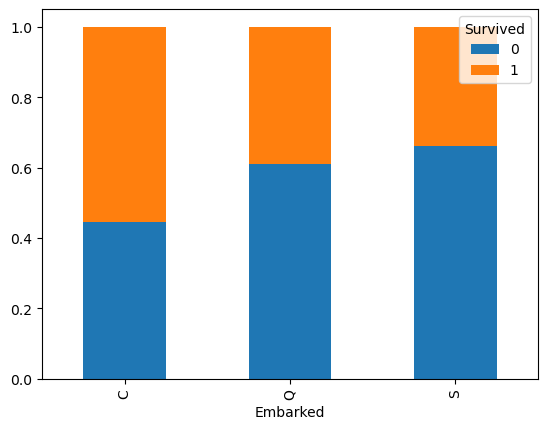

In [182]:
pd.crosstab(ttrain['Embarked'], ttrain['Survived'], normalize='index').plot(kind='bar', stacked=True)
plt.show()
#Embarked from S seems to have the most survivors

### 3. Numerical Predictors Only

#### 3.1. Set Target and Features

To begin, let's try a model based on the passenger class (`Pclass`) and parents/children features (`Parch`):

In [192]:
X_train = ttrain[['Pclass' , 'Parch']]
y_train = ttrain['Survived']

#### 3.2 Split

Split the data into training and testing subsets:

- Use `random_state` = 1

In [306]:
# ANSWER
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

#### 3.3. Build Model

Prepare a model by creating an instance of the `LogisticRegression` class from the `sklearn.linear_model` library:

In [308]:
# ANSWER
# Create Model
logreg = LogisticRegression()

Now train it on the training data subset, using the `fit` method of the model object (Nb. by default, `fit` will print the hyperparameters of the model):

In [310]:
# ANSWER
# Fit Model
logreg.fit(X_train, y_train)

LogisticRegression()

The computed coefficients are an array (`coef_`) stored in the 1st element of an array:

In [312]:
# ANSWER
logreg.coef_

array([[-0.87255641,  0.33795155]])

The computed intercept (`intercept_`) is the 1st element of another array:

In [314]:
# ANSWER
logreg.intercept_

array([1.30477093])

We can create tuples of the predictor names and coefficients like this:

In [318]:
# ANSWER
print(set(zip(['Pclass','Parch'], logreg.coef_[0])))

{('Pclass', -0.8725564114352719), ('Parch', 0.33795154959809875)}


If we want formatted output, here is a neat way to list the coefficients by predictor:

In [320]:
for col in zip(X_train.columns, logreg.coef_[0]):
    print('{:<10s}  {:+.06f}'.format(col[0], col[1]))  # Nb. increase 10 for longer names

Pclass      -0.872556
Parch       +0.337952


This result implies that survival declines with passenger class (i.e. 1st class is highest) but increases with the number of parents or children in a group.

Let's see how well the model fit the training data. The accuracy `score` is the proportion of correct predictions:

In [322]:
# ANSWER
print("accuracy =", round(logreg.score(X_train, y_train), 5))

accuracy = 0.69012


What is the accuracy `score` for the test data?

In [325]:
# ANSWER
print("accuracy =", round(logreg.score(X_test, y_test), 5))

accuracy = 0.66816


What can we say about this result?

ANSWER
- Test and train models are similar
- ...

#### 3.4. Add `AGE` as Feature

Let's include `Age` in the model. As we know from our EDA, this feature has many missing values. We don't want to throw away so many rows, so we will replace `NA` values with imputed values (e.g. the overall mean age):

In [ ]:
# ANSWER
#null values for Age already processed as part of EDA

In [340]:
features = ['Pclass', 'Parch', 'Age']
X = ttrain[features]
y = ttrain['Survived']

In [67]:
# Build Model
logreg = LogisticRegression()


In [346]:
# Fit Model
logreg.fit(X, y)


LogisticRegression()

In [350]:
# Score
logreg.score(X, y)

0.7037037037037037

So, including age did little to reduce the variance in our model. Why might this be?

ANSWER

- A small increase to mid 60's to 70% as maybe age did not play as much of a factor compared to Pclass and having a family. Perhaps the methodology of using the mean of the age distorted the data. Perhaps using Pclass and family size to determine age might have been more accurate.
- ...
- ...

Let's see where the model is going wrong by showing the Confusion Matrix:

In [359]:
# ANSWER
logreg.fit(X_test, y_test)
y_pred_class = logreg.predict(X_test)
print(metrics.confusion_matrix(y_test, y_pred_class))

[[109  19]
 [ 55  40]]


Nb. Here is how `confusion_matrix` arranges its output:

In [361]:
print(np.asarray([['TN', 'FP'], ['FN', 'TP']]))

[['TN' 'FP']
 ['FN' 'TP']]


Which type of error is more prevalent?

ANSWER: False negatives

Maybe we aren't using the right cut-off value. By default, we are predicting that `Survival` = True if the probability >= 0.5, but we could use a different threshold. The ROC curve helps us decide (as well as showing us how good our predictive model really is):

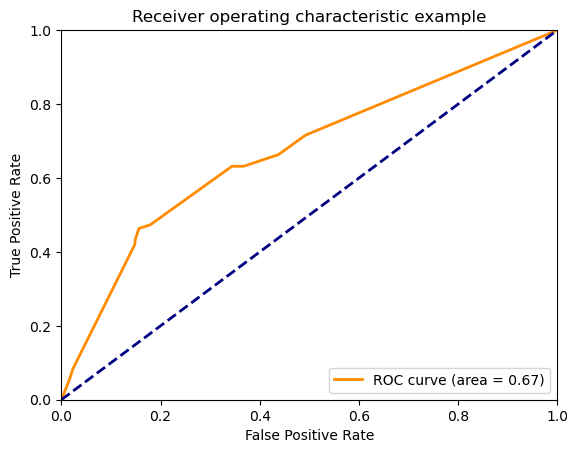

In [363]:
# Generate the prediction values for each of the test observations using predict_proba() function rather than just predict
preds = logreg.predict_proba(X_test)[:,1]

# Store the false positive rate(fpr), true positive rate (tpr) in vectors for use in the graph
fpr, tpr, _ = metrics.roc_curve(y_test, preds)

# Store the Area Under the Curve (AUC) so we can annotate our graph with this metric
roc_auc = metrics.auc(fpr, tpr)

# Plot the ROC Curve
plt.figure()
lw = 2
plt.plot(fpr, tpr, color='darkorange', lw = lw, label = 'ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color = 'navy', lw = lw, linestyle = '--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc = "lower right")
plt.show()

### 4. Including Categorical Predictors

So far, we've only used numerical features for prediction. Let's convert the character features to dummy variables so we can include them in the model:

In [14]:
titanic_with_dummies = pd.get_dummies(data = ttrain, columns = ['Sex', 'Embarked', 'Pclass'],
                                      prefix = ['Sex', 'Embarked', 'Pclass'] )
titanic_with_dummies.head()

,Survived,Name,Age,SibSp,Parch,Ticket,Fare,Cabin,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S,Pclass_1,Pclass_2,Pclass_3
PassengerId,,,,,,,,,,,,,,,,
1,0,"Braund, Mr. Owen Harris",22.0,1,0,A/5 21171,7.2500,NaN,False,True,False,False,True,False,False,True
2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.0,1,0,PC 17599,71.2833,C85,True,False,True,False,False,True,False,False
3,1,"Heikkinen, Miss. Laina",26.0,0,0,STON/O2. 3101282,7.9250,NaN,True,False,False,False,True,False,False,True
4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.0,1,0,113803,53.1000,C123,True,False,False,False,True,True,False,False
5,0,"Allen, Mr. William Henry",35.0,0,0,373450,8.0500,NaN,False,True,False,False,True,False,False,True


So, this created a column for every possible value of every categorical variable. (A more compact approach would have been to reduce the number of dummy variables by one for each feature, so that the first variable from each captures two possible states.)

Now that we have data on sex, embarkation port, and passenger class we can try to improve our `Age` imputation by stratifying it by the means of groups within the passenger population:

In [16]:
titanic_with_dummies['Age'] = titanic_with_dummies[["Age", "Parch", "Sex_male", "Pclass_1", "Pclass_2"]].groupby(["Parch", "Sex_male", "Pclass_1", "Pclass_2"])["Age"].transform(lambda x: x.fillna(x.mean()))

Now train the model using the expanded set of predictors and compute the accuracy score for the test set:

In [40]:
titanic_with_dummies.columns

Index(['Survived', 'Name', 'Age', 'SibSp', 'Parch', 'Ticket', 'Fare', 'Cabin',
       'Sex_female', 'Sex_male', 'Embarked_C', 'Embarked_Q', 'Embarked_S',
       'Pclass_1', 'Pclass_2', 'Pclass_3'],
      dtype='object')

In [94]:
# ANSWER
y_cp = titanic_with_dummies['Survived']
X_cp = titanic_with_dummies[['Age', 'SibSp', 'Parch', 'Pclass_1', 'Pclass_2', 'Pclass_3']]
X_trn, X_tst, y_trn, y_tst = train_test_split(X_cp, y_cp, random_state = 1)
logreg.fit(X_cp, y_cp)

#Score
logreg_score = logreg.score(X_tst, y_tst)
print ('Score =', logreg_score)
# Predict
logreg_preds = logreg.predict(X_tst)
print ("Predict =", logreg_preds)
# Predict probability
logreg_pred_proba = logreg.predict_proba(X_tst)[:,1]
print ("Probability =", logreg_pred_proba)

# Set Feature Both Numerical, Categorical

Score = 0.6591928251121076
Predict = [1 0 1 0 1 0 1 1 1 0 0 0 0 0 0 1 0 0 0 1 0 0 1 1 0 0 1 0 1 1 0 1 0 0 0 0 1
 0 1 0 0 0 1 1 1 0 0 0 1 1 0 1 1 0 0 0 0 0 0 0 0 0 1 1 1 0 0 0 1 0 0 0 1 0
 0 0 1 0 0 1 0 0 0 0 1 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 1 1 0 0 1 0 0 0 0 0 0
 0 0 0 1 0 0 1 0 0 0 0 0 1 1 1 0 0 0 0 0 0 0 1 0 0 1 0 0 0 1 0 1 0 0 0 0 0
 0 0 1 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0 0 0 1 1 0 1 0 1 1 0 0 0 0 1 0 0 0 1
 1 0 1 0 1 1 1 0 0 0 1 0 1 0 0 0 0 0 1 1 1 0 1 1 0 1 0 0 0 0 0 0 1 1 0 1 0
 0]
Probability = [0.52795925 0.21076437 0.59705564 0.23014503 0.78645527 0.28303773
 0.52870022 0.60425046 0.6693588  0.19464585 0.25149946 0.24398986
 0.46758842 0.46036895 0.23014503 0.71461287 0.35057972 0.22046786
 0.17742402 0.60996806 0.20218231 0.20692916 0.74632031 0.58732423
 0.29315287 0.2366336  0.78283511 0.35109856 0.50763405 0.76127393
 0.27493233 0.69191606 0.35465745 0.2136204  0.15248594 0.34805158
 0.64463026 0.21076437 0.69554608 0.2912861  0.2366336  0.33990497
 0.54819902 0.55297453 0.8

Plot the ROC curve for the new model:

In [124]:
# ANSWER
def roc_curve(xtst, ytst):

    fpr, tpr, _ = metrics.roc_curve(y_tst, logreg_pred_proba)

# Store the Area Under the Curve (AUC) so we can annotate our graph with this metric
    roc_auc = metrics.auc(fpr, tpr)

    plt.figure()
    lw = 2
    plt.plot(fpr, tpr, color='darkorange', lw = lw, label = 'ROC curve (area = %0.2f)' % roc_auc)
    plt.plot([0, 1], [0, 1], color = 'navy', lw = lw, linestyle = '--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.0])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc = "lower right")
    plt.show()

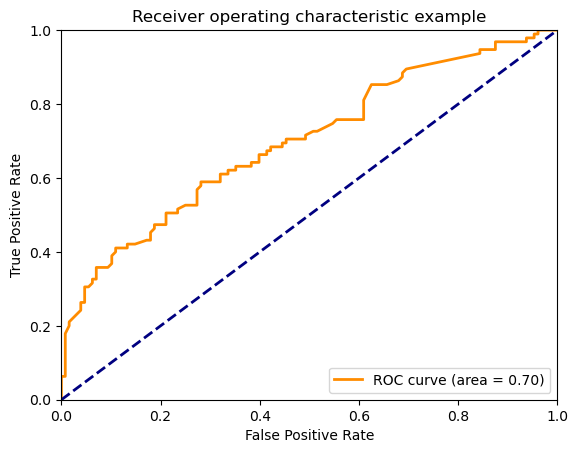

In [138]:
 # Plot the ROC Curve
roc_curve(X_trn, y_trn) #Train

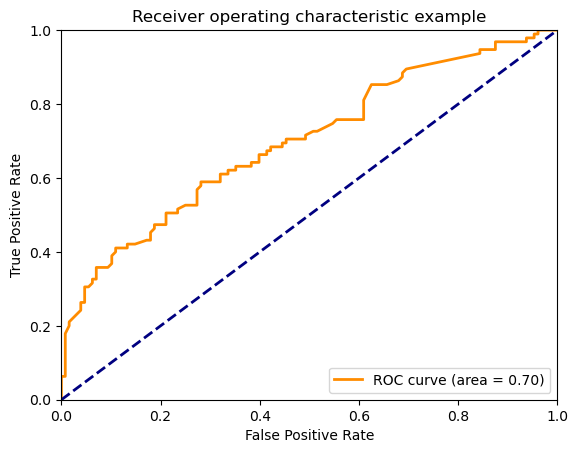

In [140]:
roc_curve(X_tst, y_tst) #Test

Can we improve the model by including the remaining features?

In [142]:
# ANSWER

y_cp = titanic_with_dummies['Survived']
X_cp = titanic_with_dummies[['Age', 'SibSp', 'Parch', 'Pclass_1', 'Pclass_2', 'Pclass_3', 'Sex_female', 'Sex_male', 'Embarked_C', 'Embarked_Q', 'Embarked_S']]
X_trn, X_tst, y_trn, y_tst = train_test_split(X_cp, y_cp, random_state = 1)
logreg.fit(X_cp, y_cp)

#Score
logreg_score = logreg.score(X_tst, y_tst)
print ('Score =', logreg_score)

Score = 0.7937219730941704


## Homework

1. Remove the `random_state` parameter (if you have used), so that the data partition will be different every time, and run through the final modelling process a few times. Do the results change?

2. Use cross-validation to assess the quality of the model when overfitting is controlled. Does the accuracy improve?

3. Look at the `fpr` & `tpr` vectors for the best model.

In [162]:
def logisticreg(X_cp, y_cp, num_runs): 
    for i in range(num_runs):
        print(f"\n--- Run {i+1} ---")

        X_trn, X_tst, y_trn, y_tst = train_test_split(X_cp, y_cp)

        logreg.fit(X_trn, y_trn)

        # Score
        logreg_score_tst = logreg.score(X_tst, y_tst)
        print('Test Score =', logreg_score_tst)
        logreg_score_trn = logreg.score(X_trn, y_trn)
        print('Train Score =', logreg_score_trn)

        # Predict
        logreg_preds_tst = logreg.predict(X_tst)

        # Predict probability
        logreg_pred_proba = logreg.predict_proba(X_tst)[:, 1]


In [240]:
logisticreg(X_cp, y_cp, 5)


--- Run 1 ---
Test Score = 0.7802690582959642
Train Score = 0.8098802395209581

--- Run 2 ---
Test Score = 0.7892376681614349
Train Score = 0.8038922155688623

--- Run 3 ---
Test Score = 0.8116591928251121
Train Score = 0.7904191616766467

--- Run 4 ---
Test Score = 0.7757847533632287
Train Score = 0.8218562874251497

--- Run 5 ---
Test Score = 0.7937219730941704
Train Score = 0.8098802395209581


C:\Users\ryant\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\ryant\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

In [186]:
y_pred_class = logreg.predict(X_tst)
confmat = metrics.confusion_matrix(y_tst, y_pred_class)
confmat

array([[112,  16],
       [ 27,  68]], dtype=int64)

In [233]:
TP = confmat[0,0]
TN = confmat[1,1]
FP = confmat[0,1]
FN = confmat[1,0]

In [249]:
#Accuracy
(TP + TN) / (TP + TN + FP + FN)

0.8071748878923767

In [253]:
#Precison
TP / (TP + FP)

0.875

In [255]:
#Recall
TP / (TP + FN)

0.8057553956834532

In [262]:
#Specificity
TN / (FP + TN)

0.8095238095238095

In [269]:
#FPR
FP / (TN + FP)

0.19047619047619047



---



---



> > > > > > > > > © 2025 Institute of Data


---



---



